# Goals
The objective of these notebooks is to parse a video-extracted png map. Say Europe 1918 : ![Europe 1918](input/europe_1918.png)
Into an SVG file, with automatic country name detection

## Steps
Here are the main steps to be taken in order to achieve these goals
1. Extract all countries' shapes
2. Extract countries' names and label the countries accordingly

## 1. Countries' shapes extraction
The notebook [Polygon extraction](polygon_extraction.ipynb) details how the polygons are extracted, and stores them.  
Here is the extracted (vector map) of europe

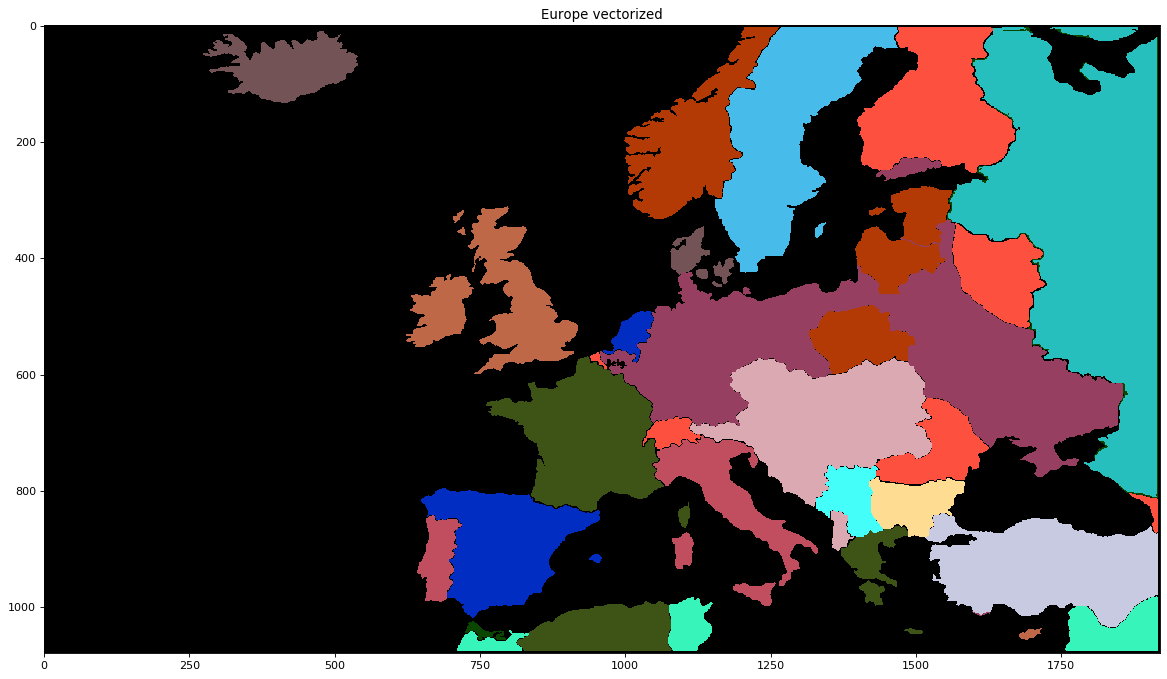

In [2]:
import os
import shapely.wkt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import skimage.draw

def load_polygons(folder):
    files = os.listdir(folder)
    res = {}
    for filename in files :
        path = os.path.join(folder, filename)
        with open(path, 'r') as wkt_file :
            polygon = shapely.wkt.loads(wkt_file.read()) 
        colour_code = filename.split('_')[0]
        try:
            res[colour_code]
        except KeyError:
            res[colour_code] = []
        res[colour_code].append(polygon)
    return [res[index] for index in res]

def draw_polygons(img, polygons, color):
    res = img.copy()
    for polygon in polygons :
        coords = np.array(polygon.exterior.coords)
        rr, cc = skimage.draw.polygon(coords[:, 1], coords[:, 0])
        res[rr, cc] = color
    return res

def display_img(img, title="", big=False) : 
    if big : 
        fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.show()

polygons = load_polygons('tmp/wkt')

europe = plt.imread('input/europe_1918.png')[:, :, :3]
europe_vector = np.zeros(europe.shape).astype(int)
for i, countryset in tqdm(enumerate(polygons), total=len(polygons)):
    europe_vector = draw_polygons(europe_vector, countryset, np.random.choice(range(256), size=3))

display_img(europe_vector, 'Europe vectorized', True)

Then, an automatic country naming can be performed. Due to OCR difficulties, the result will need corrections. But a significative part of the labelling work can be performed beforehand. Take a look at the notebook [Country labelling](country_labelling.ipynb) for more details about the process.

## 2. Text extraction with tesseract
Using the cleaned image of Europe generated in the [Polygon Extraction notebook](polygon_extraction.ipynb)

Here is what the naming algorithm is capable of so far : 
![Europe countries labelled](output/europe_labelled.png)